## Imports

In [25]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import sys
import os

In [27]:
# add library tree module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../..")

In [28]:

import numpy as np
from random import randint
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import graphviz
from graphviz import Source

from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from woodpecker.decision_tree_structure import DecisionTreeStructure


## Util functions

In [5]:
def print_scores(model, train, valid, features, target):
    """Print metrics specific to this dataset
    """
    
    prediction_train = model.predict(train[features])
    prediction_valid = model.predict(valid[features])
    print(f"train accuracy {accuracy_score(train[target], prediction_train)}")
    print(f"valid accuracy {accuracy_score(valid[target], prediction_valid)}")
    
def save_decision_tree_structure(model_param, filename_param, features_param):
    graph = Source(sklearn.tree.export_graphviz(model_param, feature_names=features_param, class_names=["0", "1"],
                                                filled=True, node_ids=True))
    graph.format = 'png'
    graph.render(filename=filename_param,view=True)
    

## Prepare dataset

In [6]:
dataset = pd.read_csv("../../resources/dataset/train_titanic.csv")

# Feature transformation
# Age
dataset["Age_na"] = dataset["Age"].isna().astype(int)
dataset.fillna({"Age":dataset.median()["Age"]}, inplace=True)

#Sex
dataset["Sex_label"] = dataset["Sex"].astype("category").cat.codes

#Cabin
dataset["Cabin_label"] = dataset["Cabin"].astype("category").cat.codes

# Embarked
dataset["Embarked_label"] = dataset["Embarked"].astype("category").cat.codes


# Feature selection
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

# Split dataset in train and validation
random_state = 1987
train, valid = train_test_split(dataset, test_size = 0.2, stratify = dataset.Survived, random_state=random_state)



## Decision Tree

### max_depth = 3

- having a small tree, we have only few nodes to investigate
- tree structure is human interpretable.

In [21]:
max_depth = 3
decision_tree_3 = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=random_state)
_ = decision_tree_3.fit(train[features], train[target])

In [13]:
save_decision_tree_structure(decision_tree_3, f"dtree_rander_{max_depth}", features)

### max_depth = 10

Now we have a more complex tree and it is not time effective to investigate all the node information. When we have a big and complex dataset, we are force to set the tree depth to bigger values. <br>
These types of tree visualisations are the most used in the sklearn community. There should be a better way to easily interprete a decision tree !

In [7]:
max_depth = 10
decision_tree_10 = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, random_state=random_state)
_ = decision_tree_10.fit(train[features], train[target])

In [8]:
save_decision_tree_structure(decision_tree_10, f"dtree_rander_{max_depth}", features)

## Woodpecker library

The library was started with two main ideas in my mind :
- To help me understand the decision tree performance and its structure
- To easily explain/justify the model prediction for some specific input.


### Setup

In [30]:
dts = DecisionTreeStructure(tree=decision_tree_10, train_dataset=train, features=features, target=target)

###  Understand decision tree performance and structure

A decision tree has two types of nodes  
- Split nodes, used to split the features space
- Leaf nodes, used to make the final predictions

The decision tree overall performance is given by each leaf performance. So it's very important to have a way to investigate the information contained in each leaf : impurity and leaf samples

#### Leaves impurity distribution

Impurity value shows how pure or impure is a node

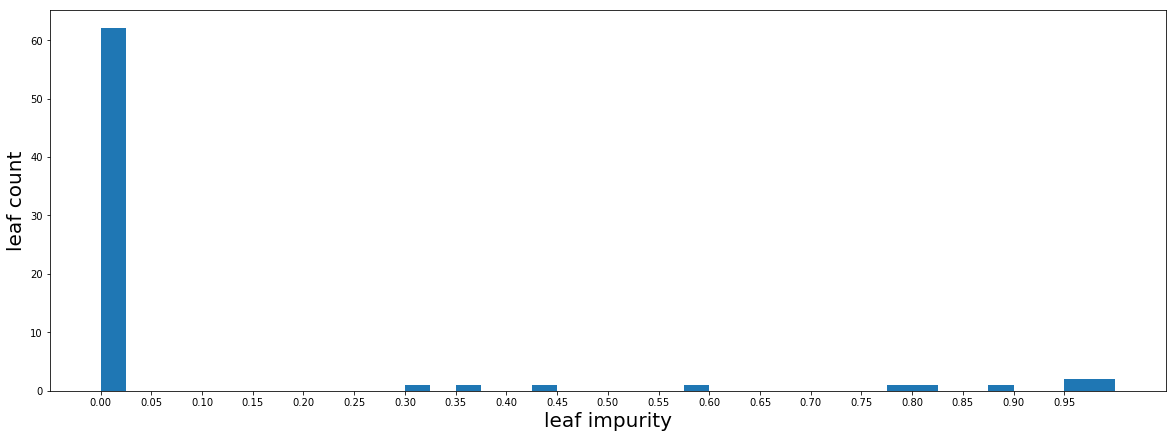

In [10]:
dts.show_leaf_impurity_distribution(bins=40, figsize=(20,7))

#### Leaves sample distribution

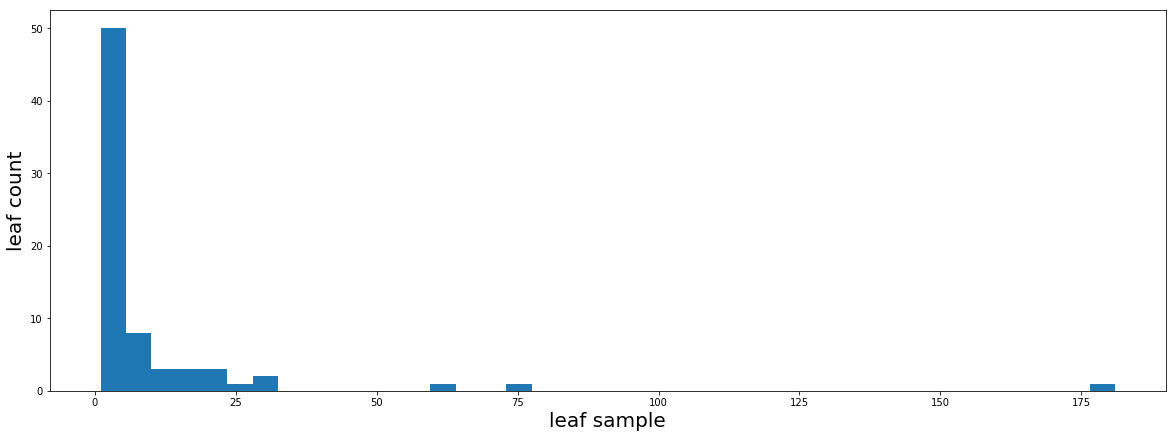

In [11]:
dts.show_leaf_samples_distribution(bins=40, figsize=(20,7))

#### Impurity and samples for each leaf

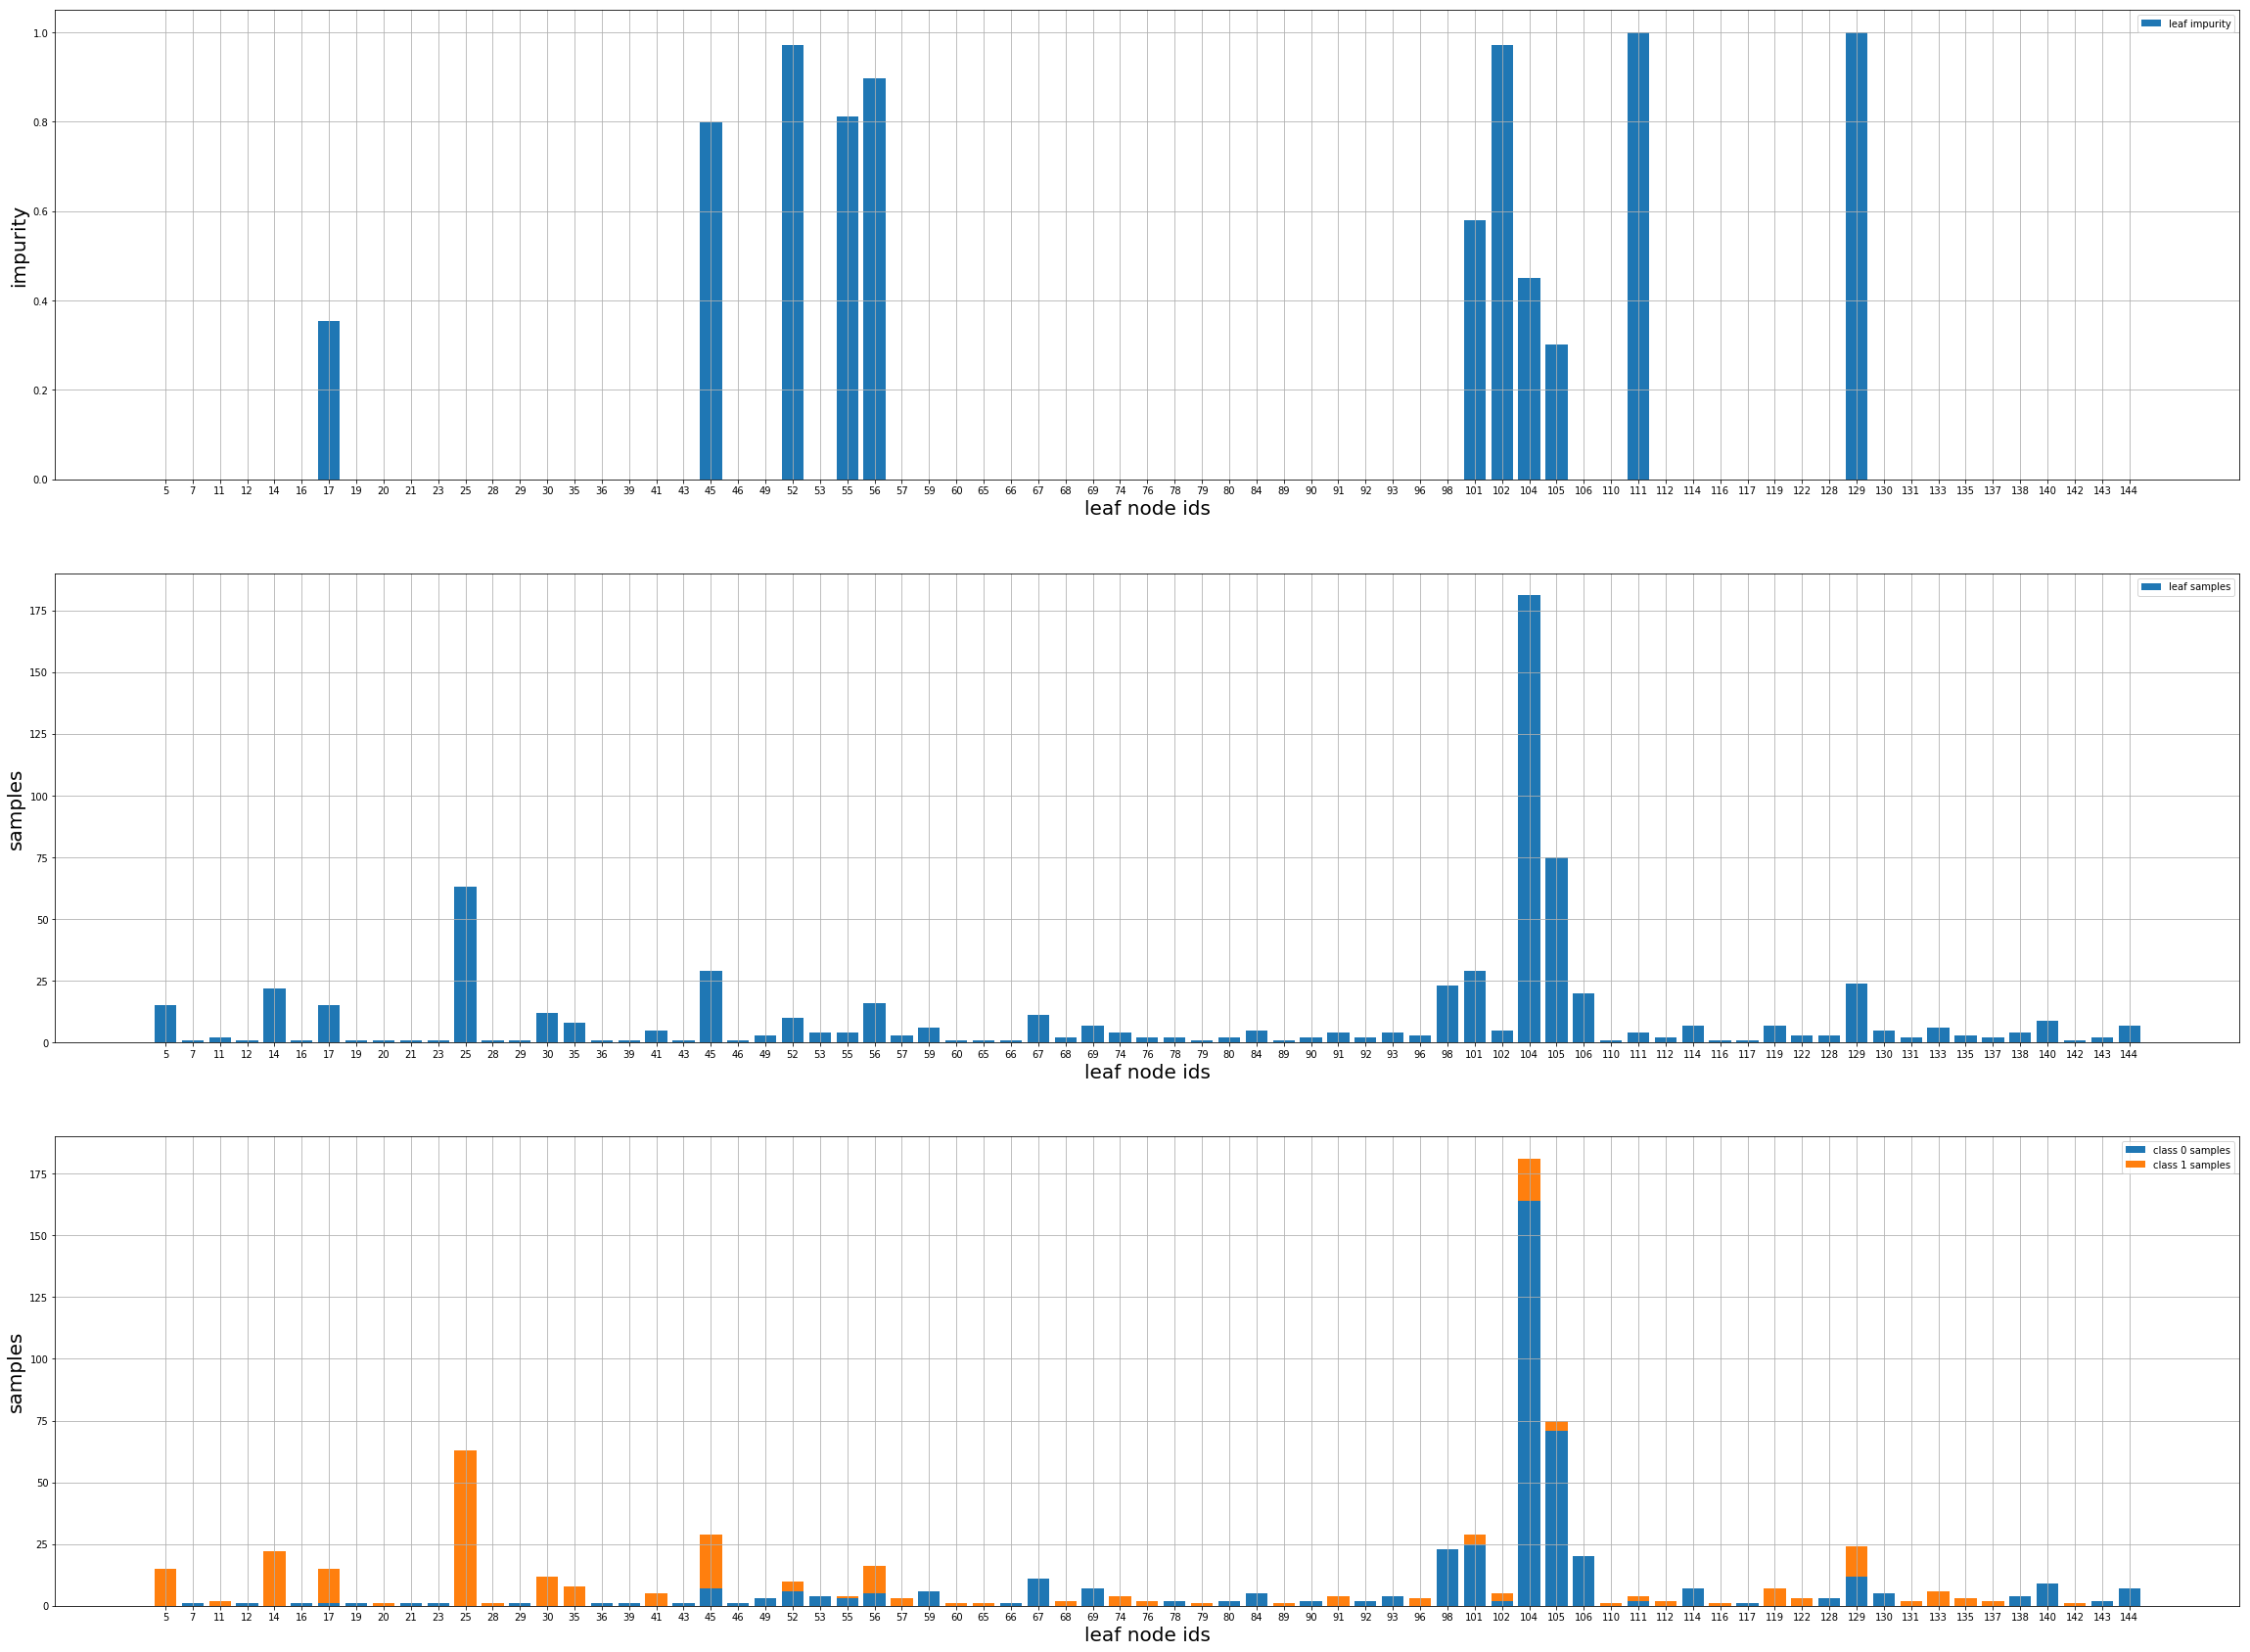

In [12]:
plt.figure(figsize=(40,30))
plt.subplot(3,1,1)
dts.show_leaf_impurity()

plt.subplot(3,1,2)
dts.show_leaf_samples()

plt.subplot(3,1,3)
dts.show_leaf_samples_by_class()

#### Investigate node samples

Investigate training samples reaching a specific/interesting leaf help us to get domain knowledge about the data and also to follow a model drive approach during project development.


In [13]:
dts.get_node_samples(25)

INFO - decision paths [[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]] 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Sex_label,Cabin_label,Embarked_label
8,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,NaN,C,0,0,-1,0
15,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,0,0,47,2
54,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,0,0,17,0
56,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,0,0,48,2
63,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,0,0,21,-1
68,487,1,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,35.0,1,0,19943,90.0000,C93,S,0,0,87,2
71,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S,0,0,20,2
86,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,0,0,-1,0
96,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,0,0,17,0
99,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0000,NaN,S,0,0,-1,2


In [14]:
dts.get_node_samples(25).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_na,Sex_label,Cabin_label,Embarked_label
count,63.000000,63.0,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.0,63.000000,63.000000
mean,485.142857,1.0,1.111111,30.873016,0.587302,0.476190,78.484192,0.158730,0.0,62.222222,1.015873
std,231.670780,0.0,0.316794,13.184169,0.557498,0.692288,30.415129,0.368359,0.0,47.161167,1.023783
min,2.000000,1.0,1.000000,3.000000,0.000000,0.000000,29.000000,0.000000,0.0,-1.000000,-1.000000
25%,310.500000,1.0,1.000000,22.500000,0.000000,0.000000,55.000000,0.000000,0.0,19.500000,0.000000
50%,505.000000,1.0,1.000000,28.000000,1.000000,0.000000,78.266700,0.000000,0.0,65.000000,2.000000
75%,623.500000,1.0,1.000000,38.500000,1.000000,1.000000,92.289600,0.000000,0.0,100.500000,2.000000
max,880.000000,1.0,2.000000,63.000000,2.000000,2.000000,146.520800,1.000000,0.0,144.000000,2.000000


In [15]:
dts.get_node_samples(98)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na,Sex_label,Cabin_label,Embarked_label
7,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S,0,1,-1,2
16,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,0,1,-1,2
31,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.0000,NaN,S,0,1,-1,2
84,758,0,2,"Bailey, Mr. Percy Andrew",male,18.0,0,0,29108,11.5000,NaN,S,0,1,-1,2
135,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,236171,13.0000,NaN,S,0,1,-1,2
162,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S,0,1,-1,2
169,765,0,3,"Eklund, Mr. Hans Linus",male,16.0,0,0,347074,7.7750,NaN,S,0,1,-1,2
208,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S,0,1,-1,2
250,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,0,1,-1,0
254,533,0,3,"Elias, Mr. Joseph Jr",male,17.0,1,1,2690,7.2292,NaN,C,0,1,-1,0


In [16]:
dts.get_node_samples(98).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_na,Sex_label,Cabin_label,Embarked_label
count,23.000000,23.0,23.000000,23.000000,23.000000,23.000000,23.000000,23.0,23.0,23.0,23.000000
mean,564.826087,0.0,2.782609,16.869565,0.260870,0.173913,10.912865,0.0,1.0,-1.0,1.826087
std,242.668246,0.0,0.421741,1.546384,0.448978,0.387553,5.264038,0.0,0.0,0.0,0.576208
min,139.000000,0.0,2.000000,11.000000,0.000000,0.000000,6.495800,0.0,1.0,-1.0,0.000000
25%,398.500000,0.0,3.000000,16.000000,0.000000,0.000000,7.775000,0.0,1.0,-1.0,2.000000
50%,676.000000,0.0,3.000000,17.000000,0.000000,0.000000,8.662500,0.0,1.0,-1.0,2.000000
75%,761.500000,0.0,3.000000,18.000000,0.500000,0.000000,11.500000,0.0,1.0,-1.0,2.000000
max,845.000000,0.0,3.000000,18.000000,1.000000,1.000000,26.000000,0.0,1.0,-1.0,2.000000


####  Show number of correct/wrong predictions for each leaf


Useful to see which/how leaves are participating in validation predictions

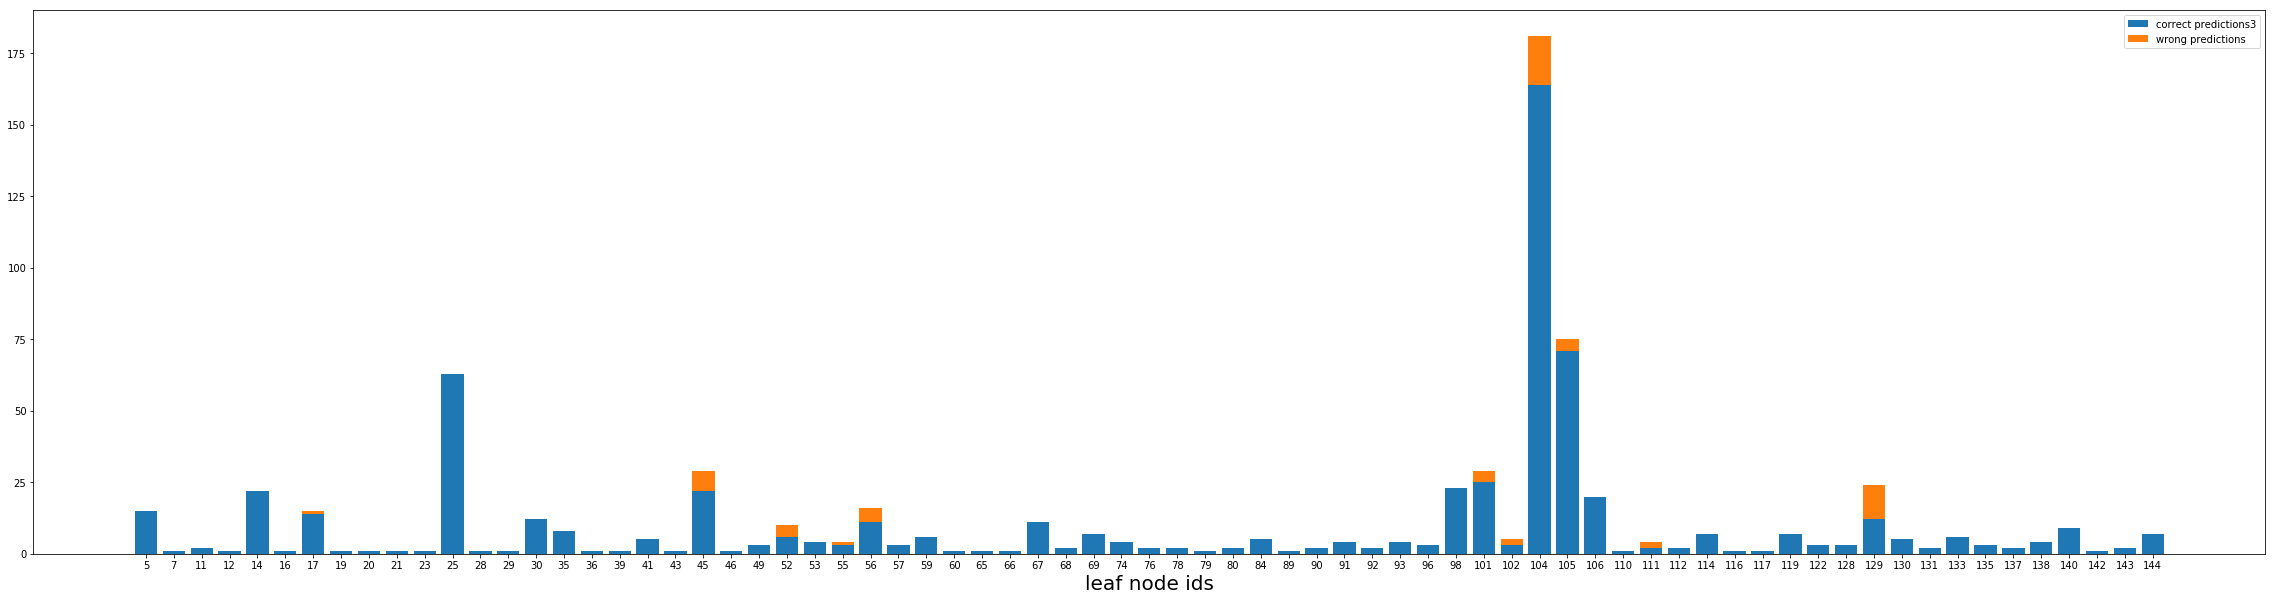

In [17]:
dts.show_leaf_predictions(train, list(train[target]), figsize=(40,10))

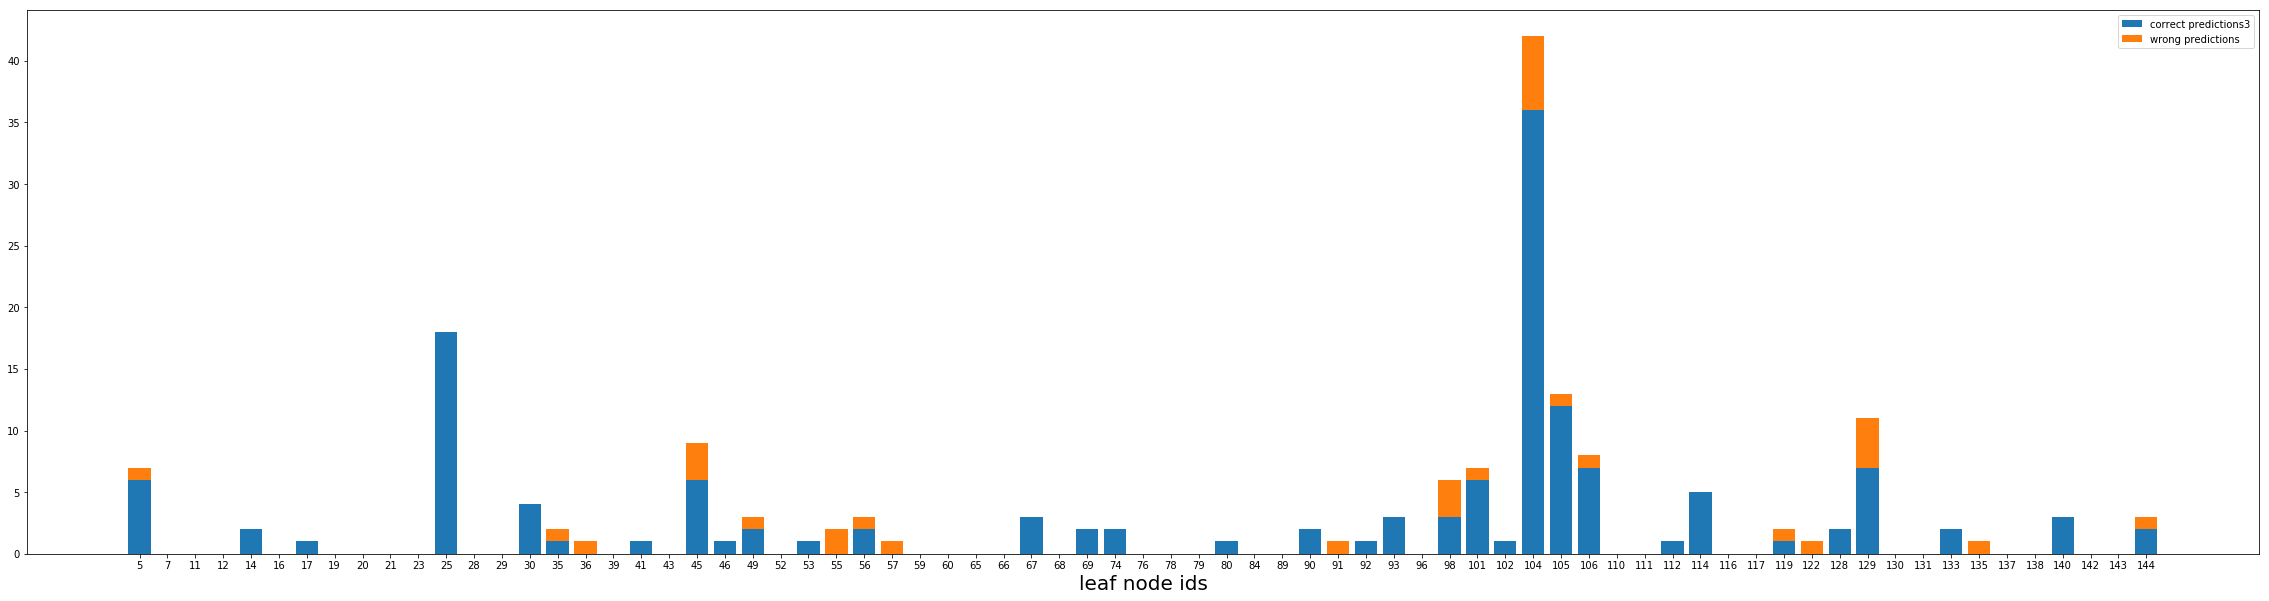

In [18]:
dts.show_leaf_predictions(valid, list(valid[target]), figsize=(40,10))

### Explain/justify the model prediction

In [23]:
sample = valid[features].iloc[randint(0, len(valid))]
sample

Pclass             3.000
Age               25.000
Fare               7.775
Sex_label          1.000
Cabin_label       -1.000
Embarked_label     2.000
Name: 442, dtype: float64

INFO - Make a prediction for sample Pclass             3.000
Age               25.000
Fare               7.775
Sex_label          1.000
Cabin_label       -1.000
Embarked_label     2.000
Name: 442, dtype: float64
INFO - decision path [  0  70  71  81  82  94  95  97  99 103 104]


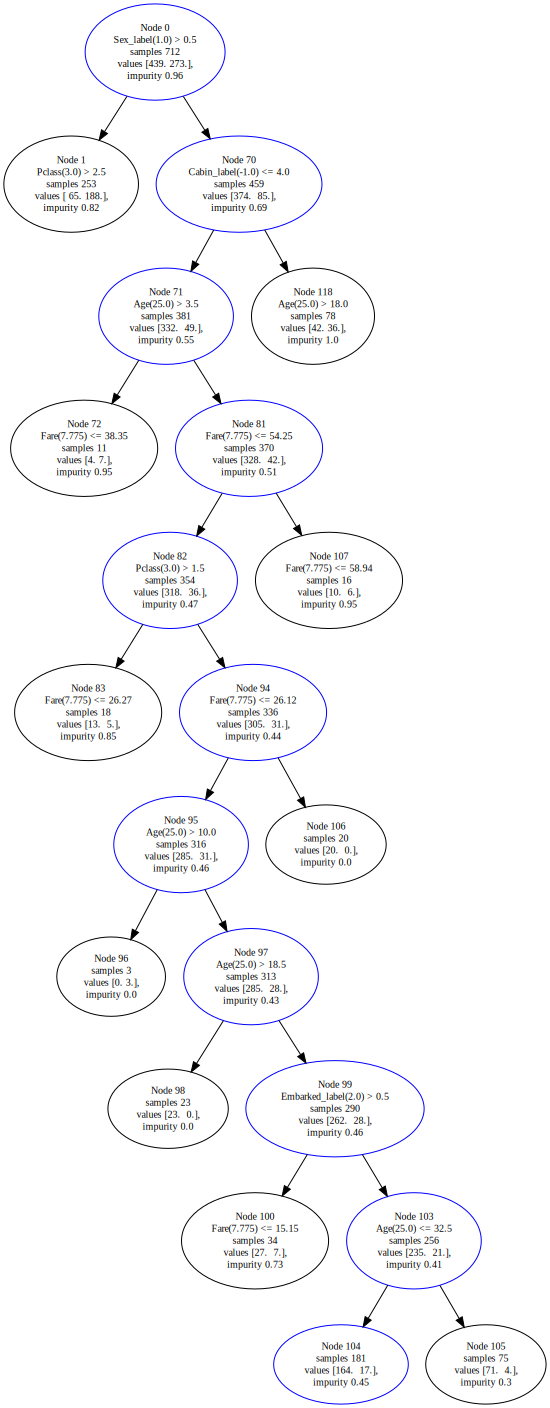

In [31]:
dts.show_decision_tree_prediction_path(sample)